# Installing Requirements and dependencies for the pre trained YOLOV5 Model

In [33]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


# Cloning the github repository for the YOLO model and installing the requirements

In [32]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [1]:
!cd yolov5 & pip install -r requirements.txt

# Importing the required libraries such as matplot , numpy to get the output as an image , open cv2 for detection

In [1]:
import torch 
from matplotlib import pyplot as plt
import numpy as np
import cv2

# Loading the Pre Trained YOLOV5 Model

In [35]:
model=torch.hub.load('ultralytics/yolov5','yolov5n')

Using cache found in C:\Users\Chetan 696/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-10-9 Python-3.11.4 torch-2.1.0+cu121 CPU

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs
Adding AutoShape... 


In [9]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# Code for live capturing of video/images

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [2]:
import uuid
import os
import time

# Labelling the images that are captured from the selfie camera

In [11]:
Images_Path=os.path.join('data_final','images')
labels=['Awake','Sleepy']
number_imgs=25

# Collecting Images for model training and using uuid library to label the images 

In [ ]:
cap=cv2.VideoCapture(0)
for label in labels:
    print("Collecting images for {}".format(labels))
    time.sleep(5)
    
    for img_num in range(number_imgs):
        print("Collecting images for {} , image number {}".format(label,img_num))
        
        ret,frame = cap.read()
        
        imgname=os.path.join(Images_Path,label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(imgname,frame)
        cv2.imshow('Image Collection',frame)
        time.sleep(2)
        
        if cv2.waitKey(10)& 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [13]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

# Using LabelImg maker to label the images accordingly 

In [12]:
!git clone https://github.com/HumanSignal/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


# Traing the Model for 500 epoch to detect Awake and Drowsy

In [11]:
!cd yolov5 && python train.py... --img 320 --batch 16 --epoch 500 --data dataset.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\Chetan': No such file or directory
YOLOv5  2023-10-7 Python-3.11.4 torch-2.1.0+cu121 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0,

# Loading the personally trained model 

In [19]:
model=torch.hub.load('ultralytics/yolov5', 'custom', path="C://Users//Chetan 696//Desktop//yolov5//runs//train//exp2//weights//last.pt",force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Chetan 696/.cache\torch\hub\master.zip
YOLOv5  2023-10-9 Python-3.11.4 torch-2.1.0+cu121 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


# Awake Images Sample Test

In [20]:
img="C://Users//Chetan 696//Desktop//yolov5//data_final//images//Awake.5ed22855-6384-11ee-8cd7-ec2e98e034e4.jpg"

In [21]:
results=model(img)
results.print()

image 1/1: 480x640 1 Awake
Speed: 9.9ms pre-process, 133.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


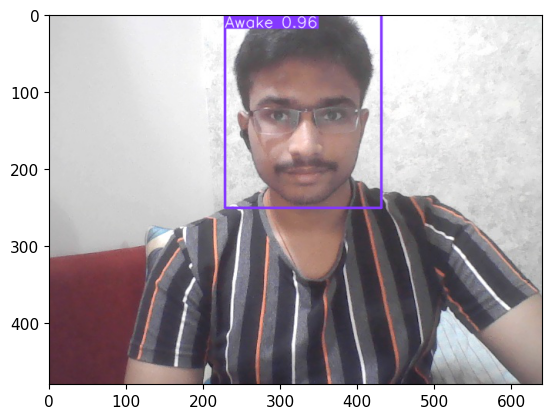

In [22]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

# Drowsy/Sleepy Images Sample Test

In [29]:
img="C://Users//Chetan 696Desktop\yolov5\data_final\images\Sleepy.8631dbf5-6384-11ee-bb7d-ec2e98e034e4.jpg"

In [30]:
results=model(img)
results.print()

image 1/1: 480x640 1 Sleepy
Speed: 9.3ms pre-process, 126.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


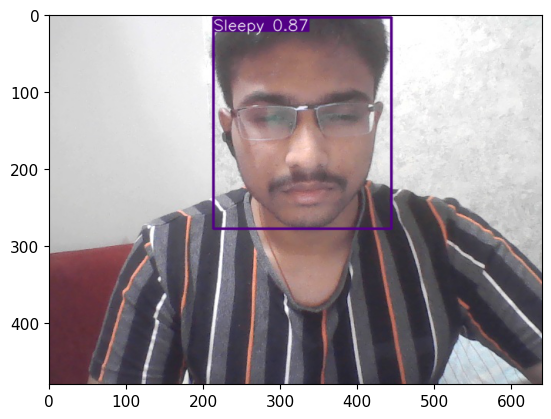

In [31]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

# Live detection using the trained model 

In [5]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()